# Setup

In [ ]:
!pip install pybit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
api_key = ""
api_secret_key = ""

In [ ]:
# Connect to Bybit

from pybit import spot

session = spot.HTTP(
    api_key=api_key,
    api_secret=api_secret_key,
    endpoint='https://api.bybit.com'
)

In [ ]:
session

# Market Data

## Price Data

In [ ]:
symbols = session.query_symbol()
symbols['result'][:2]

In [ ]:
len(symbols['result'])

267

In [ ]:
session.latest_information_for_symbol(symbol='DOTUSDT')

{'ext_code': None,
 'ext_info': None,
 'result': {'bestAskPrice': '8.36',
  'bestBidPrice': '8.35',
  'highPrice': '8.395',
  'lastPrice': '8.353',
  'lowPrice': '7.681',
  'openPrice': '8.008',
  'quoteVolume': '2926658.120793',
  'symbol': 'DOTUSDT',
  'time': 1659549530626,
  'volume': '362486.789'},
 'ret_code': 0,
 'ret_msg': None}

## Orderbook

In [ ]:
orderbook = session.orderbook(symbol='BTCUSDT')

print('Bids: ', orderbook['result']['bids'][:3])
print('Asks: ', orderbook['result']['asks'][:3])

Bids:  [['23388.53', '0.179395'], ['23388.43', '0.002543'], ['23388.33', '0.002398']]
Asks:  [['23388.54', '0.0005'], ['23388.63', '0.002543'], ['23388.67', '0.303883']]


In [ ]:
import pandas as pd

bids = pd.DataFrame(orderbook['result']['bids'], columns=['bid', 'bid_size'])
asks = pd.DataFrame(orderbook['result']['asks'], columns=['ask', 'ask_size'])

print(bids.head())
print(asks.head())

        bid  bid_size
0  23388.53  0.179395
1  23388.43  0.002543
2  23388.33  0.002398
3  23386.35  1.194214
4  23385.87     0.085
        ask  ask_size
0  23388.54    0.0005
1  23388.63  0.002543
2  23388.67  0.303883
3  23391.56  0.237966
4  23393.03  0.160026


In [ ]:
orderbook_df = pd.merge(bids, asks, left_index=True, right_index=True)
orderbook_df.head()

,bid,bid_size,ask,ask_size
0,23388.53,0.179395,23388.54,0.0005
1,23388.43,0.002543,23388.63,0.002543
2,23388.33,0.002398,23388.67,0.303883
3,23386.35,1.194214,23391.56,0.237966
4,23385.87,0.085,23393.03,0.160026


Text(0, 0.5, 'Amount')

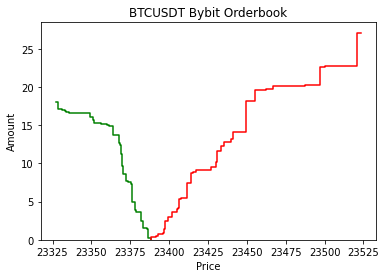

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert df columns to numeric values
orderbook_df = orderbook_df.apply(pd.to_numeric)

fig, ax = plt.subplots()
ax.set_title("BTCUSDT Bybit Orderbook")

sns.ecdfplot(x="bid", weights="bid_size", stat="count", complementary=True, data=orderbook_df, ax=ax, color='g')
sns.ecdfplot(x="ask", weights="ask_size", stat="count", data=orderbook_df, ax=ax, color='r')

ax.set_xlabel("Price")
ax.set_ylabel("Amount")

## Open Interest

In [ ]:
from pybit import inverse_perpetual

perpetual_session = inverse_perpetual.HTTP(
    endpoint="https://api-testnet.bybit.com"
)

open_interest = perpetual_session.open_interest(
    symbol="BTCUSD",
    period="30min"
)

open_interest['result'][:5]

[{'open_interest': 402054656, 'symbol': 'BTCUSD', 'timestamp': 1659551400},
 {'open_interest': 401918540, 'symbol': 'BTCUSD', 'timestamp': 1659549600},
 {'open_interest': 402434973, 'symbol': 'BTCUSD', 'timestamp': 1659547800},
 {'open_interest': 402550888, 'symbol': 'BTCUSD', 'timestamp': 1659546000},
 {'open_interest': 402655793, 'symbol': 'BTCUSD', 'timestamp': 1659544200}]

In [ ]:
open_interest_df = pd.DataFrame(open_interest['result'])
open_interest_df.drop('symbol', axis=1, inplace=True)
open_interest_df['timestamp'] = pd.to_datetime(open_interest_df['timestamp'], unit='s')
open_interest_df.head()

,open_interest,timestamp
0,402054656,2022-08-03 18:30:00
1,401918540,2022-08-03 18:00:00
2,402434973,2022-08-03 17:30:00
3,402550888,2022-08-03 17:00:00
4,402655793,2022-08-03 16:30:00


# Orders

## Market Order

In [ ]:
from pybit import inverse_perpetual

session_auth = inverse_perpetual.HTTP(
    endpoint="https://api-testnet.bybit.com",
    api_key=api_key,
    api_secret=api_secret_key
)

print(session_auth.place_active_order(
    symbol="BTCUSDT",
    side="Buy",
    order_type="Market",
    qty=20000,
    time_in_force="GoodTillCancel"
))

## Limit Order

In [ ]:
print(session_auth.place_conditional_order(
    symbol="BTCUSDT",
    order_type="Limit",
    side="Buy",
    qty=1,
    price=20100,
    base_price=20192,
    stop_px=20150,
    time_in_force="GoodTillCancel"
))

## Query Orders

In [ ]:
print(session.query_active_order(
    symbol="BTCUSDT",
    order_id="ORDER-ID-HERE"
))

In [ ]:
print(session_auth.get_active_order(
    symbol="BTCUSDT",
    order_status="Filled"
))

## Cancel Open Orders

In [ ]:
print(session_auth.cancel_active_order(
    symbol="BTCUSDT",
    order_id="ORDER-ID-HERE"
))

In [ ]:
print(session_auth.cancel_all_active_orders(
    symbol="BTCUSDT"
))

## Position Data

In [ ]:
print(session_auth.my_position(
    symbol="BTCUSDT"
))

## Set Leverage

In [ ]:
print(session_auth.set_leverage(
    symbol="BTCUSDT",
    leverage=2
))

## Wallet Balance


In [ ]:
print(session_auth.get_wallet_balance(coin="BTC"))

# WebSocket

In [ ]:
ws = inverse_perpetual.WebSocket(
    test=True,
    api_key=api_key,
    api_secret=api_secret_key
)

In [ ]:
def handler(message):
    print(message)

ws.orderbook_25_stream(handler, "BTCUSD")

# Order Example 1

In [ ]:
from pybit import spot
from time import sleep

session_auth = spot.HTTP(
    api_key=api_key,
    api_secret=api_secret_key,
    endpoint="https://api-testnet.bybit.com"
)

In [ ]:
while True:
  try:
    btc_price = float(session_auth.latest_information_for_symbol(
          symbol="BTCUSDT"
        )['result']['bestAskPrice'])
  except Exception as e:
    print(e)

  if btc_price >= 23500:
    try:
      order = session_auth.place_active_order(
          symbol="ETHUSDT",
          side="Buy",
          order_type="Market",
          qty=50,
          time_in_force="GoodTillCancel"
      )['result']['order_id']
    except Exception as e:
     print(e)

    sleep(3)

    try:
      order_status = session_auth.query_active_order(
          symbol="ETHUSDT",
          order_id=order
      )
    except Exception as e:
      print(e)

    if order_status == "Rejected" or order_status == "Cancelled":
      print("Order Malfunctioned.")
      break
    else:
      print("Order Executed.")
      break

  sleep(60)

# Order Example 2

In [ ]:
while True:
  try:
    btc_old = float(session_auth.latest_information_for_symbol(
          symbol="BTCUSDT"
        )['result']['bestAskPrice'])
  except Exception as e:
    print(e)

  sleep(300)

  try:
    btc_new = float(session_auth.latest_information_for_symbol(
          symbol="BTCUSDT"
        )['result']['bestAskPrice'])
  except Exception as e:
    print(e)

  percent_move = ((btc_new - btc_old) * 100)/btc_old

  if percent_move >= 5:
    try:
      order = session_auth.place_active_order(
          symbol="ETHUSDT",
          side="Buy",
          order_type="Market",
          qty=50,
          time_in_force="GoodTillCancel"
      )['result']['order_id']
    except Exception as e:
     print(e)

    sleep(3)

    try:
      order_status = session_auth.query_active_order(
          symbol="ETHUSDT",
          order_id=order
      )
    except Exception as e:
      print(e)

    if order_status == "Rejected" or order_status == "Cancelled":
      print("Order Malfunctioned.")
      break
    else:
      print("Order Executed.")
      break